NAME : L.KELVIN CHRISTOBER

ROLL NO : 215229120

# House Price Prediction using LR with Regularization

## Step1. [Import dataset]

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Ames_House_Sales_Cropped.csv")
df.head()

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1Fam,Y,856.0,854.0,0.0,3,706.0,0.0,1,0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1Fam,Y,1262.0,0.0,0.0,3,978.0,0.0,0,1,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,1Fam,Y,920.0,866.0,0.0,3,486.0,0.0,1,0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,1Fam,Y,961.0,756.0,0.0,3,216.0,0.0,1,0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1Fam,Y,1145.0,1053.0,0.0,4,655.0,0.0,1,0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0


In [3]:
df.shape

(1379, 39)

In [4]:
df.columns

Index(['BldgType', 'CentralAir', '1stFlrSF', '2ndFlrSF', '3SsnPorch',
       'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
       'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',
       'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
df.dtypes

BldgType          object
CentralAir        object
1stFlrSF         float64
2ndFlrSF         float64
3SsnPorch        float64
BedroomAbvGr       int64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFullBath       int64
BsmtHalfBath       int64
BsmtUnfSF        float64
EnclosedPorch    float64
Fireplaces         int64
FullBath           int64
GarageArea       float64
GarageCars         int64
GarageYrBlt      float64
GrLivArea        float64
HalfBath           int64
KitchenAbvGr       int64
LotArea          float64
LotFrontage      float64
LowQualFinSF     float64
MSSubClass         int64
MasVnrArea       float64
MiscVal          float64
MoSold             int64
OpenPorchSF      float64
OverallCond        int64
OverallQual        int64
PoolArea         float64
ScreenPorch      float64
TotRmsAbvGrd       int64
TotalBsmtSF      float64
WoodDeckSF       float64
YearBuilt          int64
YearRemodAdd       int64
YrSold             int64
SalePrice        float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BldgType       1379 non-null   object 
 1   CentralAir     1379 non-null   object 
 2   1stFlrSF       1379 non-null   float64
 3   2ndFlrSF       1379 non-null   float64
 4   3SsnPorch      1379 non-null   float64
 5   BedroomAbvGr   1379 non-null   int64  
 6   BsmtFinSF1     1379 non-null   float64
 7   BsmtFinSF2     1379 non-null   float64
 8   BsmtFullBath   1379 non-null   int64  
 9   BsmtHalfBath   1379 non-null   int64  
 10  BsmtUnfSF      1379 non-null   float64
 11  EnclosedPorch  1379 non-null   float64
 12  Fireplaces     1379 non-null   int64  
 13  FullBath       1379 non-null   int64  
 14  GarageArea     1379 non-null   float64
 15  GarageCars     1379 non-null   int64  
 16  GarageYrBlt    1379 non-null   float64
 17  GrLivArea      1379 non-null   float64
 18  HalfBath

In [7]:
df.describe(include = "all")

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
count,1379,1379,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
unique,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1Fam,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1166,1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1177.129804,353.424946,3.609862,2.865120,455.578680,48.102248,0.430747,0.058738,...,6.187092,2.920957,15.945613,6.552574,1074.445975,97.456853,1972.958666,1985.435098,2007.812183,185479.51124
std,NaN,NaN,387.014961,439.553171,30.154682,0.783961,459.691379,164.324665,0.514052,0.238285,...,1.345780,41.335545,57.249593,1.589821,436.371874,126.699192,29.379883,20.444852,1.330221,79023.89060
min,NaN,NaN,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1880.000000,1950.000000,2006.000000,35311.00000
25%,NaN,NaN,894.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,0.000000,0.000000,5.000000,810.000000,0.000000,1955.000000,1968.000000,2007.000000,134000.00000
50%,NaN,NaN,1098.000000,0.000000,0.000000,3.000000,400.000000,0.000000,0.000000,0.000000,...,6.000000,0.000000,0.000000,6.000000,1008.000000,0.000000,1976.000000,1994.000000,2008.000000,167500.00000
75%,NaN,NaN,1414.000000,738.500000,0.000000,3.000000,732.000000,0.000000,1.000000,0.000000,...,7.000000,0.000000,0.000000,7.000000,1314.000000,171.000000,2001.000000,2004.000000,2009.000000,217750.00000


In [8]:
df['PoolArea'].value_counts()

0.0      1372
519.0       1
648.0       1
512.0       1
738.0       1
555.0       1
576.0       1
480.0       1
Name: PoolArea, dtype: int64

## Step2. [Predict Sale Price without Categorical features]

In [9]:
dff = df.drop(['BldgType','CentralAir'],axis=1)
dff.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0


In [10]:
X = dff.drop(["SalePrice"],axis=1)

In [11]:
X.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008


In [12]:
y=dff[["SalePrice"]]

In [13]:
y.head()

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1193,1337.0,0.0,0.0,2,266.0,0.0,1,0,1139.0,0.0,...,5,6,0.0,0.0,5,1405.0,144.0,1998,1999,2008
910,1800.0,0.0,0.0,2,0.0,0.0,0,0,1800.0,0.0,...,5,9,0.0,0.0,7,1800.0,288.0,2007,2007,2009
1068,1328.0,653.0,0.0,4,622.0,0.0,1,0,500.0,0.0,...,3,4,0.0,0.0,7,1122.0,431.0,1928,1950,2009
1196,2018.0,0.0,0.0,3,0.0,0.0,0,0,2002.0,0.0,...,5,9,0.0,0.0,10,2002.0,144.0,2008,2009,2010
1102,959.0,712.0,0.0,3,786.0,0.0,1,0,173.0,0.0,...,5,6,0.0,0.0,7,959.0,0.0,2000,2000,2006


In [16]:
X_test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
599,1518.0,0.0,0.0,1,1218.0,0.0,0,0,300.0,0.0,...,5,8,0.0,0.0,6,1518.0,185.0,2003,2004,2008
881,925.0,0.0,0.0,2,338.0,466.0,0,1,121.0,0.0,...,6,5,0.0,0.0,5,925.0,0.0,1965,1965,2009
634,1095.0,679.0,0.0,4,0.0,0.0,1,0,1095.0,90.0,...,2,4,0.0,0.0,8,1095.0,0.0,1900,1950,2006
425,888.0,868.0,0.0,3,742.0,0.0,1,0,130.0,0.0,...,5,6,0.0,0.0,7,872.0,144.0,1996,1997,2007
906,1337.0,0.0,0.0,3,699.0,0.0,1,0,638.0,0.0,...,5,7,0.0,0.0,6,1337.0,0.0,2003,2003,2007


In [17]:
y_train.head()

,SalePrice
1193,181000.0
910,239000.0
1068,135000.0
1196,378500.0
1102,173000.0


In [18]:
y_test.head()

,SalePrice
599,274000.0
881,117500.0
634,87000.0
425,204000.0
906,185000.0


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
Reg = LinearRegression().fit(X_train,y_train)

In [21]:
y_pred = Reg.predict(X_test)

In [22]:
y_pred

array([[257434.93050736],
       [111083.73474763],
       [100018.05832309],
       [204028.53821313],
       [207319.25418313],
       [ 38036.3092893 ],
       [234153.38582869],
       [205076.12689608],
       [187014.12655243],
       [235636.78799035],
       [100976.50943772],
       [304119.5364699 ],
       [101769.64600716],
       [288758.46001593],
       [204767.89338328],
       [145002.47279614],
       [248322.97436858],
       [151533.68038633],
       [209697.39458711],
       [278312.23574158],
       [ 93329.85601475],
       [153784.14868375],
       [163237.87451132],
       [241495.91212881],
       [372429.94726945],
       [221672.07367605],
       [119658.75685734],
       [100039.78137074],
       [319435.02892077],
       [172088.64665029],
       [258772.64470121],
       [199597.36129639],
       [156349.69283221],
       [142311.22500104],
       [204807.3316132 ],
       [379608.17785443],
       [124176.23377553],
       [141127.25006141],
       [2738

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
MSE_without_CF = mean_squared_error(y_test, y_pred)
MSE_without_CF

1474827325.5973237

## Step3. [Create Scatter Plot]

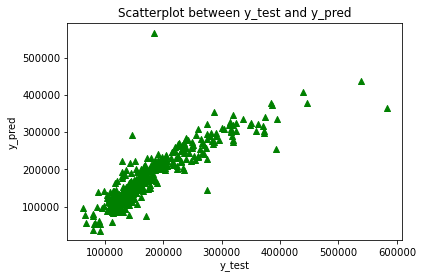

In [25]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,color='g',marker='^')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Scatterplot between y_test and y_pred')
plt.show()

## Step4.

In [26]:
df1 = pd.get_dummies(df)

In [27]:
df1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,YearRemodAdd,YrSold,SalePrice,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_N,CentralAir_Y
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,2003,2008,208500.0,1,0,0,0,0,0,1
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,1976,2007,181500.0,1,0,0,0,0,0,1
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,2002,2008,223500.0,1,0,0,0,0,0,1
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,1970,2006,140000.0,1,0,0,0,0,0,1
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,2000,2008,250000.0,1,0,0,0,0,0,1


## Step5. [Predict Sales price with categorical features]

In [28]:
X = df1.drop(["SalePrice"],axis=1)

In [29]:
X.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,YearBuilt,YearRemodAdd,YrSold,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_N,CentralAir_Y
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,2003,2003,2008,1,0,0,0,0,0,1
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,1976,1976,2007,1,0,0,0,0,0,1
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,2001,2002,2008,1,0,0,0,0,0,1
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,1915,1970,2006,1,0,0,0,0,0,1
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,2000,2000,2008,1,0,0,0,0,0,1


In [30]:
y = df1[['SalePrice']]

In [31]:
y.head()

,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,YearBuilt,YearRemodAdd,YrSold,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_N,CentralAir_Y
1193,1337.0,0.0,0.0,2,266.0,0.0,1,0,1139.0,0.0,...,1998,1999,2008,0,0,0,0,1,0,1
910,1800.0,0.0,0.0,2,0.0,0.0,0,0,1800.0,0.0,...,2007,2007,2009,1,0,0,0,0,0,1
1068,1328.0,653.0,0.0,4,622.0,0.0,1,0,500.0,0.0,...,1928,1950,2009,1,0,0,0,0,0,1
1196,2018.0,0.0,0.0,3,0.0,0.0,0,0,2002.0,0.0,...,2008,2009,2010,1,0,0,0,0,0,1
1102,959.0,712.0,0.0,3,786.0,0.0,1,0,173.0,0.0,...,2000,2000,2006,1,0,0,0,0,0,1


In [34]:
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,YearBuilt,YearRemodAdd,YrSold,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_N,CentralAir_Y
1193,1337.0,0.0,0.0,2,266.0,0.0,1,0,1139.0,0.0,...,1998,1999,2008,0,0,0,0,1,0,1
910,1800.0,0.0,0.0,2,0.0,0.0,0,0,1800.0,0.0,...,2007,2007,2009,1,0,0,0,0,0,1
1068,1328.0,653.0,0.0,4,622.0,0.0,1,0,500.0,0.0,...,1928,1950,2009,1,0,0,0,0,0,1
1196,2018.0,0.0,0.0,3,0.0,0.0,0,0,2002.0,0.0,...,2008,2009,2010,1,0,0,0,0,0,1
1102,959.0,712.0,0.0,3,786.0,0.0,1,0,173.0,0.0,...,2000,2000,2006,1,0,0,0,0,0,1


In [35]:
y_train.head()

,SalePrice
1193,181000.0
910,239000.0
1068,135000.0
1196,378500.0
1102,173000.0


In [36]:
y_test.head()

,SalePrice
599,274000.0
881,117500.0
634,87000.0
425,204000.0
906,185000.0


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
Reg = LinearRegression().fit(X_train,y_train)

In [39]:
y_pred = Reg.predict(X_test)

In [40]:
y_pred

array([[257746.67634753],
       [113257.142151  ],
       [ 83086.83449795],
       [204109.44696499],
       [209062.51895282],
       [ 69091.78945844],
       [235181.17333177],
       [205722.26326673],
       [187627.82768495],
       [234276.07879637],
       [101443.52080236],
       [304189.53558239],
       [102111.08803623],
       [289185.34424262],
       [204499.2183343 ],
       [142096.29751995],
       [249636.03306251],
       [147881.88287005],
       [210574.13858093],
       [277457.62922979],
       [ 91416.02948346],
       [153937.03347394],
       [160626.96732399],
       [243147.94924863],
       [372541.07042978],
       [219861.59417979],
       [116849.37194187],
       [100880.38852657],
       [318604.30728889],
       [168091.93524456],
       [258085.96044034],
       [201316.99711923],
       [154599.59088278],
       [142746.10647032],
       [205138.67011118],
       [382254.53304502],
       [124930.29568512],
       [141597.13070891],
       [2736

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
MSE_with_CF = mean_squared_error(y_test, y_pred)
MSE_with_CF

1461036570.1432822

## Step-6. [Normalize using StandardScaler and Predict Sale Price]

In [43]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss_X_train = ss.fit_transform(X_train)

ss_X_test = ss.transform(X_test)

In [44]:
ss_X_train

array([[ 0.39851037, -0.79290427, -0.11340519, ...,  3.45325933,
        -0.22777619,  0.22777619],
       [ 1.57467708, -0.79290427, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       [ 0.37564751,  0.70143387, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       ...,
       [ 1.22157303, -0.79290427, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       [-1.11297817,  0.90510323, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       [ 0.11145456, -0.79290427, -0.11340519, ...,  3.45325933,
        -0.22777619,  0.22777619]])

In [45]:
ss_X_test

array([[ 0.85830772, -0.79290427, -0.11340519, ...,  3.45325933,
        -0.22777619,  0.22777619],
       [-0.64810018, -0.79290427, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       [-0.21624632,  0.76093278, -0.11340519, ..., -0.2895815 ,
         4.39027446, -4.39027446],
       ...,
       [-0.04350477,  0.37647826, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       [-0.64301955,  1.46805451, -0.11340519, ..., -0.2895815 ,
        -0.22777619,  0.22777619],
       [-0.29499614,  0.81585486, -0.11340519, ...,  3.45325933,
        -0.22777619,  0.22777619]])

In [46]:
from sklearn import datasets, linear_model

In [47]:
Regr = linear_model.LinearRegression()

In [48]:
Regr.fit(ss_X_train,y_train)

LinearRegression()

In [49]:
ss_y_pred = Regr.predict(ss_X_test)

In [50]:
print("predictions of scales data \n", ss_y_pred)

predictions of scales data 
 [[257746.67634751]
 [113257.14215097]
 [ 83086.83449793]
 [204109.44696503]
 [209062.51895279]
 [ 69091.78945845]
 [235181.17333175]
 [205722.26326666]
 [187627.82768487]
 [234276.07879635]
 [101443.5208025 ]
 [304189.5355825 ]
 [102111.08803612]
 [289185.34424259]
 [204499.21833429]
 [142096.29751997]
 [249636.03306251]
 [147881.8828702 ]
 [210574.13858086]
 [277457.62922997]
 [ 91416.02948336]
 [153937.03347396]
 [160626.96732406]
 [243147.94924865]
 [372541.07042985]
 [219861.59417986]
 [116849.37194182]
 [100880.38852652]
 [318604.3072889 ]
 [168091.93524469]
 [258085.96044038]
 [201316.99711925]
 [154599.59088249]
 [142746.1064703 ]
 [205138.6701111 ]
 [382254.53304499]
 [124930.2956851 ]
 [141597.13070899]
 [273664.48982728]
 [214149.35804835]
 [170457.21544846]
 [124570.77597839]
 [197619.98987752]
 [376155.99238854]
 [148003.84323244]
 [288043.80788135]
 [108672.5169885 ]
 [218565.03839169]
 [ 88455.07127747]
 [295191.90839717]
 [125798.92162385]
 [

In [51]:
MSE_ss = mean_squared_error(y_test, ss_y_pred)

In [52]:
print("MSE_ss:",MSE_ss)

MSE_ss: 1461036570.1437433


## Step7. [Normalize using MinMaxScaler and Predict Sale Price]

In [53]:
from sklearn.preprocessing import MinMaxScaler
    
mm = MinMaxScaler()

mm_X_train = mm.fit_transform(X_train)

mm_X_test = mm.transform(X_test)

mm_lr = LinearRegression()

mm_lr.fit(mm_X_train, y_train)

mm_y_pred = mm_lr.predict(mm_X_test)

print("Predictions of scaled data using MinMaxScaler:\n", mm_y_pred)

Predictions of scaled data using MinMaxScaler:
 [[257746.67634751]
 [113257.14215097]
 [ 83086.83449793]
 [204109.44696503]
 [209062.51895279]
 [ 69091.78945845]
 [235181.17333175]
 [205722.26326666]
 [187627.82768487]
 [234276.07879635]
 [101443.5208025 ]
 [304189.5355825 ]
 [102111.08803612]
 [289185.34424259]
 [204499.21833429]
 [142096.29751997]
 [249636.03306251]
 [147881.8828702 ]
 [210574.13858086]
 [277457.62922997]
 [ 91416.02948336]
 [153937.03347396]
 [160626.96732406]
 [243147.94924865]
 [372541.07042985]
 [219861.59417986]
 [116849.37194182]
 [100880.38852652]
 [318604.3072889 ]
 [168091.93524469]
 [258085.96044038]
 [201316.99711925]
 [154599.59088249]
 [142746.1064703 ]
 [205138.6701111 ]
 [382254.53304499]
 [124930.2956851 ]
 [141597.13070899]
 [273664.48982728]
 [214149.35804835]
 [170457.21544846]
 [124570.77597839]
 [197619.98987752]
 [376155.99238854]
 [148003.84323244]
 [288043.80788135]
 [108672.5169885 ]
 [218565.03839169]
 [ 88455.07127747]
 [295191.90839717]
 [

In [54]:
mse_mm = mean_squared_error(y_test, mm_y_pred)
print("MSE (MinMaxScaler):", mse_mm)

MSE (MinMaxScaler): 1461036570.143743


## Step8. [Predict using SGD Regressor]

In [55]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()

sgd.fit(ss_X_train, y_train)

sgd_y_pred = sgd.predict(ss_X_test)

print("Predictions of scaled data using SGDRegressor:\n", sgd_y_pred)

Predictions of scaled data using SGDRegressor:
 [258617.10415138 109013.81518779  94034.79723645 205112.44676553
 211383.17075108  64458.01022956 239290.36947175 207423.04514615
 188183.65403985 236973.43281461 100042.42816092 304570.85783361
  98989.06165085 296093.87259707 205112.46985039 149334.61555734
 245693.3632666  150784.18666513 210849.17914233 275013.13880452
  92642.20583152 152635.38828237 162375.90411945 242928.23119711
 376273.94165673 220240.99845103 121912.93730674  97437.91650888
 324055.92443328 170596.02499512 257300.02888828 197335.83506578
 147778.14110064 140004.79080517 207842.67698021 384855.63079791
 119945.45063609 146183.62873811 273863.52213023 209267.43894295
 168216.67996943 124043.29062835 195810.39792806 383869.96048729
 149520.6947594  288714.80582604 104881.549055   218517.52939859
  84288.03493325 300131.47797238 124810.52112743  48957.68959458
 139507.40956528 174617.76710446 210581.57388802 111285.47893275
 102061.74176885 204231.59044577 139013.79

C:\Users\kelvin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [56]:
mse_sgd = mean_squared_error(y_test, sgd_y_pred)
print('MSE_SGD:',mse_sgd)

MSE_SGD: 1455988892.7236552


## Step8. [Predict using Ridge Regressor]

In [57]:
from sklearn.linear_model import Ridge
    
rr = Ridge()

rr.fit(ss_X_train, y_train)

rr_y_pred = rr.predict(ss_X_test)

print("Predictions of scaled data using Ridge Regression:\n", rr_y_pred)

Predictions of scaled data using Ridge Regression:
 [[257716.40699318]
 [113188.83783395]
 [ 83441.68622524]
 [204093.86685461]
 [209046.77119427]
 [ 68968.95970424]
 [235166.85073532]
 [205709.18701907]
 [187608.88092308]
 [234127.91986613]
 [101442.61753652]
 [303996.83085985]
 [102207.81104997]
 [289201.83025972]
 [204530.52882459]
 [142227.09469735]
 [249528.85892308]
 [147950.18211509]
 [210586.82424173]
 [277366.73836724]
 [ 91543.67482183]
 [153978.54592712]
 [160695.6139235 ]
 [243057.53405206]
 [372495.11731184]
 [219840.91884082]
 [116956.95574687]
 [100878.46795325]
 [318603.53970706]
 [168136.34840742]
 [258058.73912129]
 [201180.97018482]
 [154470.04859036]
 [142707.68415143]
 [205133.17128488]
 [382062.98759242]
 [124795.49109482]
 [141435.74207829]
 [273560.58911851]
 [214075.03676925]
 [170494.5832031 ]
 [124523.92339387]
 [197429.91336254]
 [375822.0370805 ]
 [148108.22483297]
 [288075.31154386]
 [108608.62662542]
 [218573.47618249]
 [ 88587.3998216 ]
 [295171.57452763

In [58]:
mse_rr = mean_squared_error(y_test, rr_y_pred)
print('MSE_RR:',mse_rr)

MSE_RR: 1458946958.0904448


## Step8. [Predict using Lasso Regression]

In [59]:
from sklearn.linear_model import Lasso
    
ls = Lasso()

ls.fit(ss_X_train, y_train)

ls_y_pred = ls.predict(ss_X_test)

print("Predictions of scaled data using Lasso Regression:\n", ls_y_pred)

Predictions of scaled data using Lasso Regression:
 [257729.69686228 113247.68204486  83142.29454527 204106.43998851
 209066.49021888  69054.81228022 235176.11930442 205711.84838767
 187608.59515698 234284.06084395 101449.25460271 304193.6360213
 102109.0711376  289198.43257911 204491.12189758 142122.85239194
 249633.03850946 147889.3873303  210566.82234788 277458.74148889
  91422.16023407 153936.54170005 160629.24135716 243131.57205681
 372542.62040315 219872.31056047 116863.87010022 100885.24049767
 318608.68254302 168098.13679091 258090.97848895 201288.31490053
 154603.02948577 142756.31460187 205137.22911272 382237.47687556
 124919.66167664 141572.72803651 273666.16449995 214125.2076817
 170460.20631671 124565.97224865 197629.92077736 376132.94977617
 148005.53413165 288031.84338491 108663.12260663 218568.08286906
  88451.65003835 295193.48660115 125792.5796616   54906.97302469
 133434.7793381  173716.93120033 214868.54616558 110315.71602181
 101776.23316753 198433.20185705 139852.

C:\Users\kelvin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255369835012.67914, tolerance: 658828795.2438439
  model = cd_fast.enet_coordinate_descent(


In [60]:
mse_ls = mean_squared_error(y_test, ls_y_pred)
print('MSE_LS:',mse_ls)

MSE_LS: 1460906418.1159027


## Step9. [RMSE]

In [61]:
import numpy as np

In [62]:
#RMSE without one hot encoding
print("RMSE without Categorical Feature: ",np.sqrt(MSE_without_CF))
#RMSE with one hot encoding
print("\nRMSE with Categorical Feature: ",np.sqrt(MSE_with_CF))
#RMSE with OHE and Standard Scaling
print("\nRMSE with Categorical data and Standard Scaling: ",np.sqrt(MSE_ss))
#RMSE with OHE and MinMax Scaling
print("\nRMSE with Categorical data and MinMax Scaling: ",np.sqrt(mse_mm))
#RMSE of SGDRegressor with OHE and Standard Scaler
print("\nRMSE of SGDREgressor with Standard scaler: ",np.sqrt(mse_sgd))
#RMSE of RidgeCV with OHE and Standard Scaler
print("\nRMSE of RidgeCV with Standard scaler: ",np.sqrt(mse_rr))
#RMSE of LassoCV with OHE and Standard Scaler
print("\nRMSE of LassoCV with Standard scaler: ",np.sqrt(mse_ls))

RMSE without Categorical Feature:  38403.48064430259

RMSE with Categorical Feature:  38223.50808263525

RMSE with Categorical data and Standard Scaling:  38223.50808264128

RMSE with Categorical data and MinMax Scaling:  38223.508082641274

RMSE of SGDREgressor with Standard scaler:  38157.42251153313

RMSE of RidgeCV with Standard scaler:  38196.16418032634

RMSE of LassoCV with Standard scaler:  38221.805531867576


In [63]:
# Storing the MSE in a dictionary
data_mse = {'MSE_without_CF':[38403.48064430541],
            'MSE_with_CF':[38223.50808263985],
            'MSE_ss':[38223.50808264128],
            'mse_mm':[38223.50808264125],
            'mse_sgd':[38366.91471632221],
           'mse_rr':[38196.164180326334],
           'mse_ls':[38221.805531867576]}

# find key with lowest value
best_key = min(data_mse, key=data_mse.get)

print(best_key)

mse_rr
